### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Median income:  51381.5
Mean income:  52247.25135379061


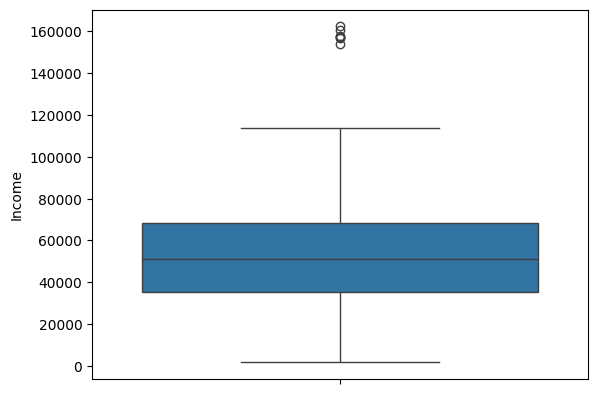

In [8]:
import seaborn as sns

sns.boxplot(df[df['Income'] <= 600000]['Income'])

print("Median income: ", df['Income'].median())
print("Mean income: ", df['Income'].mean())

In [9]:
# Так як медіана та середнє досить близькі одне до одного - замінимо медіанним значенням, так як присутні незначні викиди.
df['Income'] = df['Income'].fillna(df['Income'].median())

In [10]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Дані успішно замінені

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [11]:
df.select_dtypes(object)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [12]:
print(f"Unique Education values: {df['Education'].unique()}")
print(f"Unique Marital status values: {df['Marital_Status'].unique()}")

Unique Education values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique Marital status values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [13]:
df[np.isin(df['Marital_Status'], ['Absurd', 'YOLO'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1


Статуси `Absurd` `YOLO` скоріше за все викиди, які не несуть цінної інформації, оскільки їх лише 4 в усьому наборі даних. Просто видалимо їх.
`Education` закодуємо за зростанням грейду, а `Marital Status` закодуємо за кількістю осіб в родині: Married, Together - 2, інші - 1.

In [14]:
df.drop(df[np.isin(df['Marital_Status'], ['Absurd', 'YOLO'])].index, inplace=True)

In [15]:
education_encoder = {
    "2n Cycle": 0, "Graduation": 1, "Basic": 2, "Master": 3, "PhD": 4
}

marital_encoder = {
    "Married": 2, "Together": 2, "Single": 1, "Divorced": 1, "Widow": 1, "Alone": 1
}

df['Education'] = df['Education'].map(education_encoder)
df['Marital_Status'] = df['Marital_Status'].map(marital_encoder)

Змінні `Dt_Customer` та `Year_Birth` замінив на нову змінну `Age`. На мій погляд вона буде інформативнішою для нашої задачі.

In [16]:
def process_date(birth_date, event_date):
    age = int((pd.Timestamp(event_date) - pd.Timestamp(birth_date, 1, 1)).days / 365)
    return age

df['Age'] = df.apply(lambda row: process_date(row['Year_Birth'], row['Dt_Customer']), axis=1)

# так як присутня змінна Age, видалимо 2 залежні до її змінні
df.drop(columns=['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

Змінна `ID` не є інформативною, оскільки вона є унікальною для кожного клієнта та не несе цінності. Також змінні `Z_CostContact`, `Z_Revenue` не є інформативні, оскільки значення є статичними для усіх записів

In [17]:
columns = df.loc[:, ~np.isin(df.columns, ['ID', 'Z_CostContact', 'Z_Revenue'])].columns.tolist()
X = df[columns]

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(n_clusters=3, n_init='auto')
model.fit(X)

labels = model.predict(X)

print(f"20 predicted labels: {labels[:20]}")

20 predicted labels: [1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0]


In [19]:
centroids = model.cluster_centers_

silhouette = metrics.silhouette_score(X, labels, metric='euclidean')

print(f'Silhouette Coefficient metric: {silhouette:.2f}')

Silhouette Coefficient metric: 0.60


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [20]:
import plotly.io as pio
from plotly.express import scatter_3d
pio.renderers.default = 'colab'

In [21]:
# NumDealsPurchases: Кількість покупок, зроблених з використанням знижок
# NumWebPurchases: Кількість покупок, зроблених через вебсайт компанії
# NumCatalogPurchases: Кількість покупок, зроблених за каталогом
# NumStorePurchases: Кількість покупок, зроблених безпосередньо у магазинах
# NumWebVisitsMonth: Кількість відвідувань вебсайту компанії за останній місяць

fig = scatter_3d(df, x='Income', y='NumWebPurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

In [22]:
fig = scatter_3d(df, x='Income', y='NumCatalogPurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

In [23]:
fig = scatter_3d(df, x='Income', y='NumStorePurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

In [24]:
pd.DataFrame(labels).value_counts()

,count
0,
0,1165
1,1070
2,1


Бачимо, що аномалія, яка потрапила у кластеризацію була позначена як окремий кластер. Через це дуже розмились інші 2 базові кластери. На графіку чітко видно кластер користувачів які мають низький річний дохід, але без здійснення покупок. Даний кластер потрібно було б виділити окремо, але через аномалію він потрапив до ближчого кластеру

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [25]:
normalized_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_X = normalized_df[columns]

model = KMeans(n_clusters=3, n_init='auto')
model.fit(normalized_X)

labels = model.predict(normalized_X)
centroids = model.cluster_centers_
silhouette = metrics.silhouette_score(normalized_X, labels, metric='euclidean')

print(f'Silhouette Coefficient metric: {silhouette:.2f}')

Silhouette Coefficient metric: 0.18


In [26]:
fig = scatter_3d(normalized_df, x='Income', y='NumStorePurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

Бачимо, що метрика силуета значно знизилась, що вказує на те, що якість кластеризації погіршилась. Також значення, яке було викидом стало частиною одного з кластерів. Я підозрюю, що проблема пов'язана з відстанню між кластерами. Оскільки масштабовані дані лежать в межах від 0 до 1, відстань між кластерами буде значно меншою, ніж в "сирих" даних

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [27]:
# Викид з Income більше 600000 є єдиним, тому його я просто видалю
df.drop(df[df['Income'] > 600000].index, inplace=True)

Також присутні випадки, коли річний дохід складає більше 100 тисяч, таких випадків близько 20 кейсів. На мою думку це не є викидом, проте це виразно більше, ніж в інших користувачів, тому я Income заміню на найбільше число менше 100 тисяч.
Така ж ситуація з кількістю відвідувань через сайт. Аналогічно, не вважаю це викидами, проте вони дещо віддалені від основного кластеру. Заміню усі значення більше 10 на значення 10.

In [28]:
# до трансформацій
clear_X = df[columns]

model = KMeans(n_clusters=3, n_init='auto')
model.fit(clear_X)

labels = model.predict(clear_X)

centroids = model.cluster_centers_
silhouette = metrics.silhouette_score(clear_X, labels, metric='euclidean')

print(f'Silhouette Coefficient metric: {silhouette:.2f}')

Silhouette Coefficient metric: 0.54


In [29]:
fig = scatter_3d(clear_X, x='Income', y='NumStorePurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

In [30]:
# після трансформацій
df.loc[df['Income'] >= 100000, 'Income'] = df[df['Income'] < 100000]['Income'].max()
df.loc[df['NumWebVisitsMonth'] >= 10, 'NumWebVisitsMonth'] = 10

clear_X = df[columns]

model = KMeans(n_clusters=3, n_init='auto')
model.fit(clear_X)

labels = model.predict(clear_X)

centroids = model.cluster_centers_
silhouette = metrics.silhouette_score(clear_X, labels, metric='euclidean')

print(f'Silhouette Coefficient metric: {silhouette:.2f}')

Silhouette Coefficient metric: 0.55


In [31]:
fig = scatter_3d(clear_X, x='Income', y='NumStorePurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

Тепер кластери стали більш повними, без викидів

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

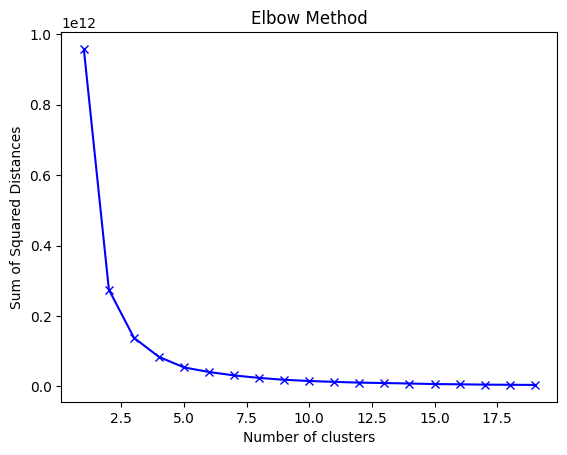

In [32]:
sum_of_squared_distances = []
cluster_range = range(1, 20)

for number_clusters in cluster_range:
    model = KMeans(n_clusters=number_clusters, n_init='auto').fit(clear_X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(cluster_range, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Відповідно до "методу ліктя" обираю 5 кластерів, оскільки між 4 та 5 кластерами спад був більш крутим, після 5 кластеру сума квадратів відстаней падала значно менше. Крива на після 5 кластеру полога

In [33]:
model = KMeans(n_clusters=5, n_init='auto')
model.fit(clear_X)

labels = model.predict(clear_X)

centroids = model.cluster_centers_
silhouette = metrics.silhouette_score(clear_X, labels, metric='euclidean')

print(f'Silhouette Coefficient metric: {silhouette:.2f}')

Silhouette Coefficient metric: 0.54


In [34]:
fig = scatter_3d(clear_X, x='Income', y='NumStorePurchases', z='NumWebVisitsMonth', color=labels)
fig.show()

Бачимо що найважливішою змінною є Income, скоріше за все кластеризація відбувається з найбільшим впливом цієї змінноюї

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

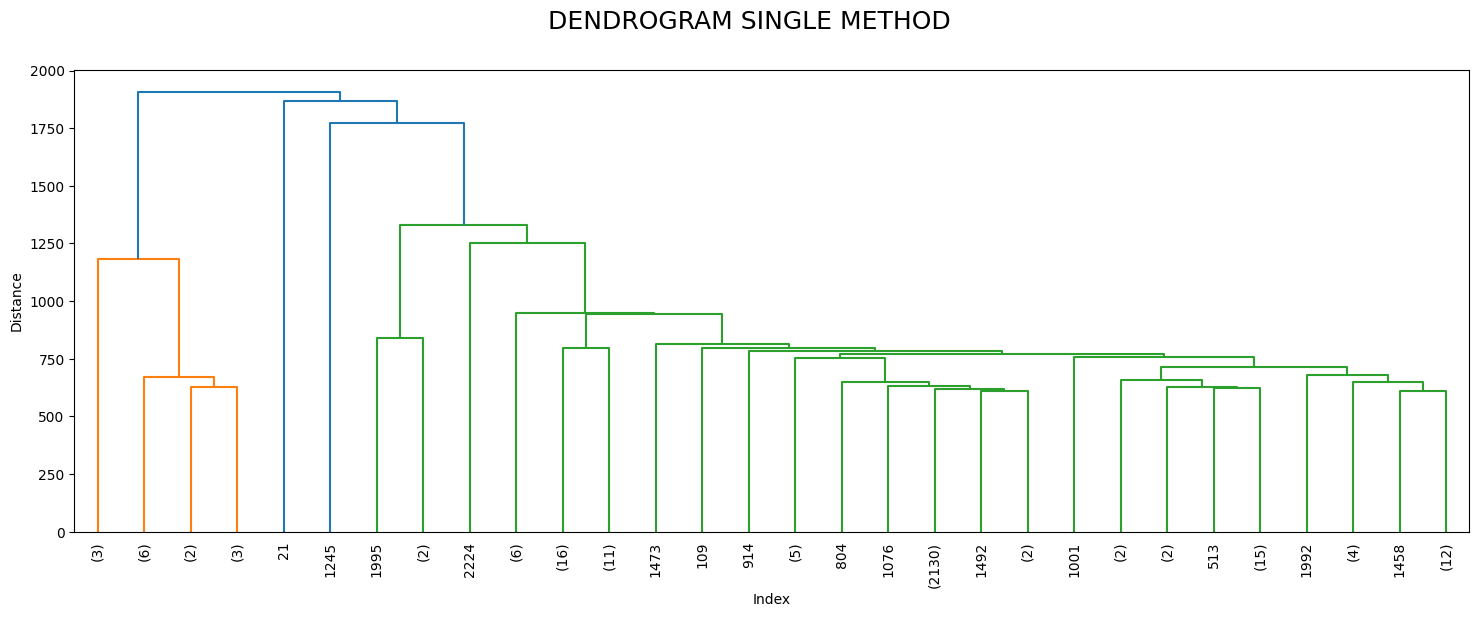

In [36]:
dist_sin = linkage(clear_X, method="single")

plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [37]:
df['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

<Axes: title={'center': 'K = 3'}, xlabel='Income', ylabel='NumWebVisitsMonth'>

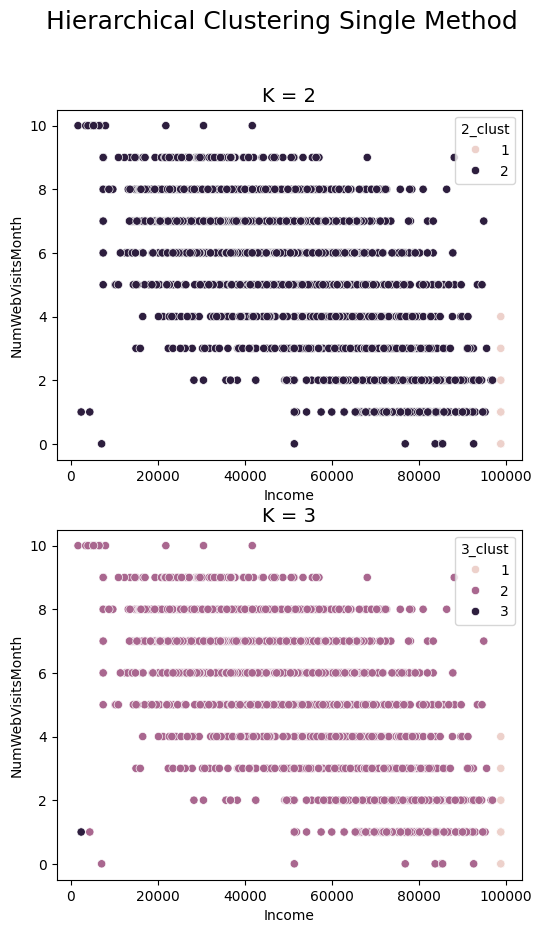

In [38]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="NumWebVisitsMonth", data=df, hue="2_clust")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="NumWebVisitsMonth", data=df, hue="3_clust")

In [44]:
print(f"Silhouette metric for 2 clusters: {metrics.silhouette_score(clear_X, df['2_clust'], metric='euclidean'):.2f}")
print(f"Silhouette metric for 3 clusters: {metrics.silhouette_score(clear_X, df['3_clust'], metric='euclidean'):.2f}")

Silhouette metric for 2 clusters: 0.40
Silhouette metric for 3 clusters: 0.18


Ієрархічна агломеративна кластеризація показала гіршу якість кластеризації. Метрика силуету для 2-х кластерів складає `0.4`, для 3-х кластерів - `0.18`. На мою думку кластеризація в такому вигляді не має сенсу, алгоритм KMeans показував кращі результати

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [45]:
from sklearn.cluster import DBSCAN

In [125]:
dbscan = DBSCAN(eps=1.0, min_samples=4)
dbscan.fit(clear_X)
labels = dbscan.labels_

In [141]:
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters:', np.unique(labels).shape[0], ' with claster labels:', np.unique(labels))
print('Estimated number of noise points:', n_noise_)

s = metrics.silhouette_score(clear_X, dbscan.labels_)
print(f'Silhouette Coefficient for clusterisation: {s:.2f}')

Estimated number of clusters: 2  with claster labels: [-1  0]
Estimated number of noise points: 2231
Silhouette Coefficient for clusterisation: -0.18


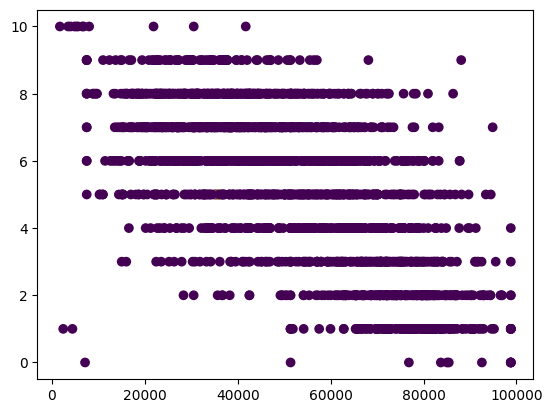

In [142]:
plt.scatter(clear_X['Income'], clear_X['NumWebVisitsMonth'], c=labels)
plt.show()

In [143]:
pd.Series(labels).value_counts()

,count
-1,2231
0,4


DBSCAN кластеризував дані не дуже якісно, на що вказує як і метрика сиулету так і наявність великої кількості аномалій. На мою думку дана кластеризація не має сенсу, оскільки дані не показують реальну картину та не несе інформативності